In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Descriptive statistics

## variance

The variance is the mean of the squared differences to the mean - calculated using np.var(), variance is denoted by Var(x) and the mean as "x bar"

In [2]:
x = np.array([1,2,3,4,5,6])

In [3]:
np.var(x)

2.9166666666666665

## Standard deviation

The standard deviation is the square root of the variance for the sample - denoted as sigma

NOTE: we square root the variance to get back to the units of the observations, both variance and standard deviation will always be positive 

## covariance & correlation 

Covariance tells you whether large values in one variable (given that the variable is a SET of values) are associated with large values in another variable, likewise for small values

Covariance is calculated by multiplying the difference from the mean for both variables and dividing by the number of samples

If covariance is positive it means that large and small values between the 2 samples vary in the same direction 

If negative this indicates that large values in one sample are correlated with small values in the other

A covariance of 0 means there is no linear relationship between the variables

In [33]:
data_beer = pd.read_csv("https://raw.githubusercontent.com/hadrienj/essential_math_for_data_science/master/data/beer_dataset.csv")

In [34]:
data_beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


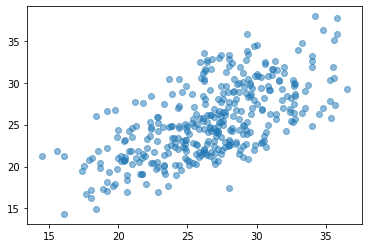

In [36]:
plt.scatter(data_beer['Temperatura Maxima (C)'],data_beer['Consumo de cerveja (litros)'], alpha=0.5)

this indicates a positive covariance ie as the temp increases and the volume of beer consumed increases. 

### calculating the covariance

In [37]:
x = data_beer['Temperatura Maxima (C)'] 
y = data_beer['Consumo de cerveja (litros)'] 

In [38]:
np.sum((x - np.mean(x)) * (y - np.mean(y))) /x.shape[0]

12.172649474197785

or you can use

In [39]:
np.cov(data_beer['Temperatura Maxima (C)'],data_beer['Consumo de cerveja (litros)'] )

array([[18.63964745, 12.20609082],
       [12.20609082, 19.35245652]])

this indicates the covar of 12.2 (look across the diagonal bottom left to top right), this varies from 12.17 due the use of the bessel correction the division is by the number of samples -1. (correct by setting the delta degrees of fredom to 0 ddf) as below

In [42]:
np.cov(data_beer['Temperatura Maxima (C)'],data_beer['Consumo de cerveja (litros)'], ddof=0 )

array([[18.58857992, 12.17264947],
       [12.17264947, 19.2994361 ]])